# Contexte

Dans ce notebook, on va Réaliser un moteur de classification d'articles basé sur une image et une description pour l'automatisation de l'attribution de la catégorie des articles mises en vente sur une place de marché, afin d’améliorer l’expérience des utilisateurs de cette plateforme.

On va analyser le jeu de données en réalisant un prétraitement des images et des descriptions des produits, une réduction de dimension, puis un clustering.

<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-des-librairies-et-préparation-de-l'environnement-du-travail" data-toc-modified-id="Import-des-librairies-et-préparation-de-l'environnement-du-travail-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import des librairies et préparation de l'environnement du travail</a></span></li><li><span><a href="#Import,-traitement-et-préparation-du--jeu-de-données-Text" data-toc-modified-id="Import,-traitement-et-préparation-du--jeu-de-données-Text-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import, traitement et préparation du  jeu de données Text</a></span></li><li><span><a href="#Nettoyage-et-prépataion-des-données-textuelles" data-toc-modified-id="Nettoyage-et-prépataion-des-données-textuelles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nettoyage et prépataion des données textuelles</a></span></li><li><span><a href="#Représentation-des-données-textuelles" data-toc-modified-id="Représentation-des-données-textuelles-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Représentation des données textuelles</a></span><ul class="toc-item"><li><span><a href="#Bag-of-Words" data-toc-modified-id="Bag-of-Words-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Bag of Words</a></span></li><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>TF-IDF</a></span></li><li><span><a href="#Encodeur-de-phrases-universel" data-toc-modified-id="Encodeur-de-phrases-universel-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Encodeur de phrases universel</a></span></li></ul></li><li><span><a href="#Réduction-de-dimensionalité" data-toc-modified-id="Réduction-de-dimensionalité-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Réduction de dimensionalité</a></span><ul class="toc-item"><li><span><a href="#Latent-Dirichlet-Allocation" data-toc-modified-id="Latent-Dirichlet-Allocation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Latent Dirichlet Allocation</a></span><ul class="toc-item"><li><span><a href="#LDA-sur-Bag-of-words" data-toc-modified-id="LDA-sur-Bag-of-words-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>LDA sur Bag of words</a></span></li><li><span><a href="#LDA-sur-Bag-of-words" data-toc-modified-id="LDA-sur-Bag-of-words-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>LDA sur Bag of words</a></span></li></ul></li></ul></li><li><span><a href="#Réduction-de-dimensionalité" data-toc-modified-id="Réduction-de-dimensionalité-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Réduction de dimensionalité</a></span><ul class="toc-item"><li><span><a href="#TSNE-et-clustering" data-toc-modified-id="TSNE-et-clustering-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>TSNE et clustering</a></span><ul class="toc-item"><li><span><a href="#TSNE-sur-Bag-of-Words" data-toc-modified-id="TSNE-sur-Bag-of-Words-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>TSNE sur Bag of Words</a></span></li><li><span><a href="#TSNE-sur-TFIDF" data-toc-modified-id="TSNE-sur-TFIDF-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>TSNE sur TFIDF</a></span></li><li><span><a href="#TSNE-sur-Universal-Encoder" data-toc-modified-id="TSNE-sur-Universal-Encoder-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>TSNE sur Universal Encoder</a></span></li></ul></li><li><span><a href="#Analyse-des-Composantes-principales" data-toc-modified-id="Analyse-des-Composantes-principales-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Analyse des Composantes principales</a></span><ul class="toc-item"><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>TF-IDF</a></span></li><li><span><a href="#Universal-encoder" data-toc-modified-id="Universal-encoder-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Universal encoder</a></span></li></ul></li></ul></li><li><span><a href="#Clustering-avec-K-means" data-toc-modified-id="Clustering-avec-K-means-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Clustering avec K-means</a></span><ul class="toc-item"><li><span><a href="#Recherche-du-nombre-de-clusters-optimal" data-toc-modified-id="Recherche-du-nombre-de-clusters-optimal-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Recherche du nombre de clusters optimal</a></span></li><li><span><a href="#Modélisation-avec-Kmeans" data-toc-modified-id="Modélisation-avec-Kmeans-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Modélisation avec Kmeans</a></span><ul class="toc-item"><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>TF-IDF</a></span></li><li><span><a href="#Universal-encoder" data-toc-modified-id="Universal-encoder-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Universal encoder</a></span></li></ul></li></ul></li><li><span><a href="#Import,-traitement-et-préparation-du--jeu-de-données-Images" data-toc-modified-id="Import,-traitement-et-préparation-du--jeu-de-données-Images-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Import, traitement et préparation du  jeu de données Images</a></span><ul class="toc-item"><li><span><a href="#Pré-traitement-des-images-via-SIFT" data-toc-modified-id="Pré-traitement-des-images-via-SIFT-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Pré-traitement des images via SIFT</a></span><ul class="toc-item"><li><span><a href="#Création-des-descripteurs-de-chaque-image" data-toc-modified-id="Création-des-descripteurs-de-chaque-image-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Création des descripteurs de chaque image</a></span></li><li><span><a href="#Création-des-clusters-de-descripteurs" data-toc-modified-id="Création-des-clusters-de-descripteurs-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Création des clusters de descripteurs</a></span></li></ul></li><li><span><a href="#Création-des-features-des-images" data-toc-modified-id="Création-des-features-des-images-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Création des features des images</a></span></li><li><span><a href="#Réductions-de-dimension" data-toc-modified-id="Réductions-de-dimension-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Réductions de dimension</a></span><ul class="toc-item"><li><span><a href="#Réduction-de-dimension-PCA-et-clustering-avec-Kmeans" data-toc-modified-id="Réduction-de-dimension-PCA-et-clustering-avec-Kmeans-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>Réduction de dimension PCA et clustering avec Kmeans</a></span></li><li><span><a href="#Réduction-de-dimension-T-SNE-et-clustering-avec-Kmeans" data-toc-modified-id="Réduction-de-dimension-T-SNE-et-clustering-avec-Kmeans-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>Réduction de dimension T-SNE et clustering avec Kmeans</a></span></li></ul></li><li><span><a href="#Transfer-learning-avec-le-model-VGG16-pré-entrainé-sur-ImageNet" data-toc-modified-id="Transfer-learning-avec-le-model-VGG16-pré-entrainé-sur-ImageNet-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Transfer learning avec le model VGG16 pré-entrainé sur ImageNet</a></span><ul class="toc-item"><li><span><a href="#Réduction-de-dimension-PCA/TSNE-et-clustering-avec-Kmeans" data-toc-modified-id="Réduction-de-dimension-PCA/TSNE-et-clustering-avec-Kmeans-8.4.1"><span class="toc-item-num">8.4.1&nbsp;&nbsp;</span>Réduction de dimension PCA/TSNE et clustering avec Kmeans</a></span></li></ul></li></ul></li><li><span><a href="#Combinaison-des-données-textuelles-et-images" data-toc-modified-id="Combinaison-des-données-textuelles-et-images-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Combinaison des données textuelles et images</a></span><ul class="toc-item"><li><span><a href="#TSNE" data-toc-modified-id="TSNE-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>TSNE</a></span></li><li><span><a href="#PCA-et-clustering" data-toc-modified-id="PCA-et-clustering-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>PCA et clustering</a></span></li></ul></li></ul></div>

## Import des librairies et préparation de l'environnement du travail

In [10]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [11]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model, optimizers, Input
from sklearn.preprocessing import OrdinalEncoder
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import os
import re
import nltk
import glob
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer
import cv2 as cv
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import cross_validate
# %% inline pylab
InteractiveShell.ast_node_interactivity = "all"

6:5: E271 multiple spaces after keyword
7:5: E271 multiple spaces after keyword
8:5: E271 multiple spaces after keyword


## Import, traitement et préparation du  jeu de données Text

In [12]:
path = r"\Users\Utilisateur\Downloads\Data\TEXT.csv"
data = pd.read_csv(path)

In [13]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [14]:
data.shape

(1050, 15)

In [15]:
len(data.product_category_tree.unique())

642

In [16]:
# On vérifie que les images sont uniques
len(data['image'].unique())

1050

## Nettoyage et prépataion des données textuelles

On vérifie si on a des données manquantes sur la colonne description

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [18]:
# nltk.download()

Import des stopwords.

In [19]:
stop_words = set(stopwords.words('english'))

In [20]:
example = data['description'][0]

On va créer nous contenter des classes de produits génériques, elles sont délimitées par ">>"

In [21]:
data['product_category_tree'] = data['product_category_tree'].apply(lambda x: x.split(" >>")[0][2:])

1:80: E501 line too long (100 > 79 characters)


In [22]:
data['product_category_tree'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

On remarque qu'on peut séparer les produits en 7 catégories principales: « Ameublement », « Soins de bébé », « Montres »,
 « Décoration d'intérieur et besoins festifs », « Cuisine et salle à manger », « Beauté et soins personnels », «Informatique».

On va créer trois méthodes:
- La première pour effectuer l'opération de 'Stemming' est le processus de production de variantes morphologiques d'un mot racine/base. Les programmes de stemming sont communément appelés algorithmes de stemming ou stemmers. Un algorithme de radical réduit les mots « chocolats », « chocolatey », « choco » à la racine du mot, « chocolat » et « récupération », « récupéré », « récupérer » réduit à la racine « récupérer ».
- La deuxième pour effectuer l'opération de 'Lemmatizing' La lemmatisation est le processus consistant à regrouper les différentes formes fléchies d'un mot afin qu'elles puissent être analysées comme un seul élément. La lemmatisation est similaire au stemming, mais elle apporte un contexte aux mots. Il relie donc des mots ayant des significations similaires à un seul mot. Le prétraitement du texte comprend à la fois le Stemming et la Lemmatisation. On va préférer la lemmatisation  au Stemming car elle fait une analyse morphologique des mots. 
- la troisième englobe notre prétraitement: elle transforme les entrées en minuscules, supprime la ponctuation en plus de transformer, supprime les stopwords et  applique la lemmatization et stemming.

In [23]:
def stemmer(data):
    snow_stemmer = SnowballStemmer(language='english')
    data = data.apply(lambda x: ' '.join([snow_stemmer.stem(item) for item in x.split()]))
    return data

3:80: E501 line too long (90 > 79 characters)


In [24]:
def lemmatizer(data):
    lemmatizer = WordNetLemmatizer()
    data = data.apply(lambda x: ' '.join([lemmatizer.lemmatize(item)for item in x.split()]))
    return data

3:80: E501 line too long (92 > 79 characters)


In [25]:
def pretraitement_text(data):
    data['description'] = data['description'].apply(str)
    data['description'] = data['description'].apply(lambda x: x.lower())
    data['description'] = data['description'].apply(lambda x: re.sub(r'[^\D\s]', '', x))
    data['description'] = data['description'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
    data['description'] = lemmatizer(data['description'])
    tokenizer = RegexpTokenizer(r'\w+')
    data_descr = data['description'].apply(lambda x: tokenizer.tokenize(str(x)))
    print(data_descr)
    data_descr = data_descr.apply(lambda x: " ".join(x))
    data_descr = data_descr.apply(lambda x: str(x))
    return data_descr

4:80: E501 line too long (88 > 79 characters)
5:80: E501 line too long (127 > 79 characters)
8:80: E501 line too long (80 > 79 characters)


In [26]:
data_descr = pretraitement_text(data)

0       [key, feature, elegance, polyester, multicolor...
1       [specification, sathiyas, cotton, bath, towel,...
2       [key, feature, eurospa, cotton, terry, face, t...
3       [key, feature, santosh, royal, fashion, cotton...
4       [key, feature, jaipur, print, cotton, floral, ...
                              ...                        
1045    [oren, empower, extra, large, self, adhesive, ...
1046    [wallmantra, large, vinyl, sticker, sticker, p...
1047    [buy, uberlyfe, extra, large, pigmented, polyv...
1048    [buy, wallmantra, medium, vinyl, sticker, stic...
1049    [buy, uberlyfe, large, vinyl, sticker, rs, onl...
Name: description, Length: 1050, dtype: object


On va comparer un exemple du dataset principale avant et après pretraitement pour se rassurer que notre pretraitement a bel et bien était effectué

In [27]:
example

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [28]:
data_descr[0]

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain cm height pack price rs curtain enhances look interiors this curtain made high quality polyester fabric it feature eyelet style stitch metal ring it make room environment romantic loving this curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing prints bring home elegant curtain softly filter light room get right amount sunlight specifications elegance polyester multicolor abstract eyelet door curtain cm height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimension length

On remarque donc que la description a été mise en minuscule, que la ponctuation a été retirée, que les "stop words"( of, this,...)ont été retirés, les mots sont transformés en forme radicale( lemmatization.

In [29]:
text = list(data_descr.values)

In [30]:
text

['key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain cm height pack price rs curtain enhances look interiors this curtain made high quality polyester fabric it feature eyelet style stitch metal ring it make room environment romantic loving this curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing prints bring home elegant curtain softly filter light room get right amount sunlight specifications elegance polyester multicolor abstract eyelet door curtain cm height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimension lengt

on va créer une fonction qui calcule le nombre d'occurences des mots, car on va garder que les mots ayant un nombre d'occurences supérieure à un seuil.

In [31]:
def wordListToFreqDict(wordlist):
    elt = RegexpTokenizer(r'\w+').tokenize(str(wordlist))
    wordfreq = [elt.count(p) for p in elt]
    return dict(list(zip(elt, wordfreq)))

In [32]:
wordlist = wordListToFreqDict(text)

In [33]:
wordlist

{'key': 225,
 'feature': 392,
 'elegance': 11,
 'polyester': 69,
 'multicolor': 160,
 'abstract': 53,
 'eyelet': 44,
 'door': 39,
 'curtain': 50,
 'floral': 63,
 'cm': 568,
 'height': 115,
 'pack': 319,
 'price': 535,
 'rs': 903,
 'enhances': 8,
 'look': 102,
 'interiors': 7,
 'this': 14,
 'made': 189,
 'high': 113,
 'quality': 245,
 'fabric': 211,
 'it': 22,
 'style': 112,
 'stitch': 2,
 'metal': 30,
 'ring': 9,
 'make': 101,
 'room': 76,
 'environment': 4,
 'romantic': 1,
 'loving': 1,
 'ant': 5,
 'wrinkle': 3,
 'anti': 24,
 'shrinkage': 4,
 'elegant': 50,
 'apparance': 1,
 'give': 122,
 'home': 168,
 'bright': 17,
 'modernistic': 1,
 'appeal': 9,
 'designs': 5,
 'surreal': 1,
 'attention': 5,
 'sure': 38,
 'steal': 1,
 'hearts': 1,
 'contemporary': 13,
 'valance': 1,
 'slide': 2,
 'smoothly': 3,
 'draw': 5,
 'apart': 4,
 'first': 12,
 'thing': 3,
 'morning': 29,
 'welcome': 2,
 'sun': 5,
 'ray': 1,
 'want': 6,
 'wish': 5,
 'good': 40,
 'whole': 10,
 'world': 19,
 'close': 1,
 'eveni

In [34]:
occurences = dict(sorted(wordlist.items(), key=lambda x: x[1]))

In [35]:
occurences

{'romantic': 1,
 'loving': 1,
 'apparance': 1,
 'modernistic': 1,
 'surreal': 1,
 'steal': 1,
 'hearts': 1,
 'valance': 1,
 'ray': 1,
 'close': 1,
 'joyous': 1,
 'softly': 1,
 'filter': 1,
 'duster': 1,
 'asvtwl': 1,
 'mediam': 1,
 'enriched': 1,
 'deserve': 1,
 'renowned': 1,
 'susceptible': 1,
 'shuvam': 1,
 'perfact': 1,
 'goldbedi': 1,
 'machinewash': 1,
 'onle': 1,
 'uft': 1,
 'tsw': 1,
 'reminders': 1,
 'hijri': 1,
 'gregorian': 1,
 'calnedars': 1,
 'qur': 1,
 'an': 1,
 'bookmark': 1,
 'alrams': 1,
 'sapphire': 1,
 'metres': 1,
 'sw': 1,
 'megnet': 1,
 'arrival': 1,
 'girlswatch': 1,
 '_blk': 1,
 'hybrid': 1,
 'sportier': 1,
 'increased': 1,
 'analogue': 1,
 'calculation': 1,
 'oodles': 1,
 'exciting': 1,
 'furniture': 1,
 'furnishings': 1,
 'kitchenware': 1,
 'dsnsan': 1,
 'thrade': 1,
 'dco': 1,
 'riva': 1,
 'shag': 1,
 'bathmat_ri': 1,
 'freshener': 1,
 'grams': 1,
 'helped': 1,
 'diseases': 1,
 'showed': 1,
 'greater': 1,
 'southampton': 1,
 'mrsa': 1,
 'remain': 1,
 'alive':

In [36]:
occurences = [elt for elt in occurences.keys() if occurences[elt] > 3]

In [37]:
len(occurences)

1901

## Représentation des données textuelles

On va représenter notre corpus avec la représentation Bag-of-words et TF-IDF.

### Bag of Words

Cette méthode se base sur l'idée qu'un document particulier est représenté par l'histogramme des occurrences des mots le composant: pour un document donné, chaque mot se voit affecté le nombre de fois qu'il apparaît dans le document (voir la notion de multi-ensemble, bag en anglais). Un document est donc représenté par un vecteur de la même taille que le dictionnaire, dont la composante i indique le nombre d'occurrences du i-ème mot du dictionnaire dans le document

In [38]:
def bow(corpus):
    vectorizer = CountVectorizer(min_df=3)
    X = vectorizer.fit_transform(corpus)
    return X, vectorizer

In [39]:
X, vectorizer_bow = bow(text)

In [40]:
len(text)

1050

In [41]:
len(X.todense()[0].tolist()[0])

1524

In [42]:
text[0]

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain cm height pack price rs curtain enhances look interiors this curtain made high quality polyester fabric it feature eyelet style stitch metal ring it make room environment romantic loving this curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing prints bring home elegant curtain softly filter light room get right amount sunlight specifications elegance polyester multicolor abstract eyelet door curtain cm height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimension length

In [43]:
len(text[0])

1091

In [44]:
X.todense()[0][0:].sum()

135

In [45]:
# les noms des features
feature_names = vectorizer_bow.get_feature_names()
len(feature_names)
feature_names

1524

['aapno',
 'able',
 'absorbent',
 'abstract',
 'ac',
 'accessory',
 'according',
 'across',
 'act',
 'actual',
 'adapter',
 'adaptor',
 'add',
 'addition',
 'additional',
 'adhesive',
 'adidas',
 'adjustable',
 'adorable',
 'adorn',
 'adsl',
 'advice',
 'aero',
 'affordable',
 'age',
 'air',
 'akup',
 'alarm',
 'allow',
 'allows',
 'almond',
 'aloevera',
 'along',
 'also',
 'aluminium',
 'always',
 'amazing',
 'amount',
 'analog',
 'andre',
 'android',
 'angel',
 'animal',
 'anna',
 'anodised',
 'another',
 'ant',
 'anti',
 'antique',
 'antiqueshop',
 'app',
 'apparels',
 'appeal',
 'appealing',
 'appearance',
 'apple',
 'application',
 'applied',
 'apply',
 'approx',
 'arabian',
 'archies',
 'area',
 'aroma',
 'around',
 'art',
 'artificial',
 'artisan',
 'artist',
 'artistic',
 'artwork',
 'aspect',
 'assembled',
 'assembly',
 'assorted',
 'assure',
 'assured',
 'asus',
 'attention',
 'attitude',
 'attivo',
 'attractive',
 'audio',
 'authentication',
 'automatic',
 'availability',
 '

In [46]:
# nos données transformées
data_Bow = pd.DataFrame(X.toarray(), columns=feature_names)

In [47]:
data_Bow

,aapno,able,absorbent,abstract,ac,accessory,according,across,act,actual,...,year,yellow,yes,yet,yl,ym,you,yourself,youthful,zyxel
0,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

Cette mesure permet d'évaluer l'importance d'un terme contenu dans un document, relativement à une collection ou un corpus. Le poids augmente proportionnellement au nombre d'occurrences du mot dans le document. Il varie également en fonction de la fréquence du mot dans le corpus. 

In [48]:
def tf_idf(corpus):
    vectorizer = TfidfVectorizer(min_df=3)
    X = vectorizer.fit_transform(corpus)
    return X, vectorizer

In [49]:
X_tf, vectorizer_tf = tf_idf(text)

In [50]:
X_tf

<1050x1524 sparse matrix of type '<class 'numpy.float64'>'
	with 31230 stored elements in Compressed Sparse Row format>

In [51]:
vectorizer_tf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=3, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [52]:
# les noms des features
feature_names_tf = vectorizer_tf.get_feature_names()
len(feature_names_tf)
feature_names_tf

1524

['aapno',
 'able',
 'absorbent',
 'abstract',
 'ac',
 'accessory',
 'according',
 'across',
 'act',
 'actual',
 'adapter',
 'adaptor',
 'add',
 'addition',
 'additional',
 'adhesive',
 'adidas',
 'adjustable',
 'adorable',
 'adorn',
 'adsl',
 'advice',
 'aero',
 'affordable',
 'age',
 'air',
 'akup',
 'alarm',
 'allow',
 'allows',
 'almond',
 'aloevera',
 'along',
 'also',
 'aluminium',
 'always',
 'amazing',
 'amount',
 'analog',
 'andre',
 'android',
 'angel',
 'animal',
 'anna',
 'anodised',
 'another',
 'ant',
 'anti',
 'antique',
 'antiqueshop',
 'app',
 'apparels',
 'appeal',
 'appealing',
 'appearance',
 'apple',
 'application',
 'applied',
 'apply',
 'approx',
 'arabian',
 'archies',
 'area',
 'aroma',
 'around',
 'art',
 'artificial',
 'artisan',
 'artist',
 'artistic',
 'artwork',
 'aspect',
 'assembled',
 'assembly',
 'assorted',
 'assure',
 'assured',
 'asus',
 'attention',
 'attitude',
 'attivo',
 'attractive',
 'audio',
 'authentication',
 'automatic',
 'availability',
 '

In [53]:
# nos données transformées
data_tf = pd.DataFrame(X_tf.toarray(), columns=feature_names_tf)
data_tf

,aapno,able,absorbent,abstract,ac,accessory,according,across,act,actual,...,year,yellow,yes,yet,yl,ym,you,yourself,youthful,zyxel
0,0.0,0.0,0.0,0.176527,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.194639,0.076271,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.045986,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.043132,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.034402,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1046,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.101366,0.0,0.0
1047,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1048,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### Encodeur de phrases universel

L'encodeur de phrase universel encode le texte en vecteurs de grande dimension qui peuvent être utilisés pour la classification de texte, la similitude sémantique, le regroupement et d'autres tâches en langage naturel. L'encodeur de phrase universel pré-formé est disponible publiquement dans Tensorflow-hub .

In [54]:
# import tensorflow_text
os.environ["TFHUB_CACHE_DIR"] = "some_dir"
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print("module %s loaded" % module_url)


def embed(input):
    return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [55]:
text_embeddings = embed(text)

In [56]:
text_embeddings

<tf.Tensor: shape=(1050, 512), dtype=float32, numpy=
array([[-0.0531099 , -0.05259518,  0.02100289, ...,  0.04626882,
         0.04199424, -0.03971305],
       [-0.04437473, -0.05011784, -0.00215673, ...,  0.02704445,
         0.02934513,  0.00775384],
       [-0.05387556, -0.04903491, -0.02537707, ...,  0.05160163,
        -0.02153101, -0.04973481],
       ...,
       [-0.01805485, -0.05704618, -0.03089449, ..., -0.029506  ,
         0.04250809, -0.05088435],
       [-0.02144242, -0.05666086,  0.02914818, ...,  0.01336424,
        -0.01151534,  0.00795   ],
       [-0.04496235, -0.0555121 ,  0.01629731, ...,  0.02055719,
        -0.01248673,  0.01801236]], dtype=float32)>

In [57]:
data_univenc = pd.DataFrame(text_embeddings)
data_univenc

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,"tf.Tensor(-0.053109895, shape=(), dtype=float32)","tf.Tensor(-0.05259518, shape=(), dtype=float32)","tf.Tensor(0.021002894, shape=(), dtype=float32)","tf.Tensor(0.05090016, shape=(), dtype=float32)","tf.Tensor(0.013150396, shape=(), dtype=float32)","tf.Tensor(0.04719765, shape=(), dtype=float32)","tf.Tensor(-0.035478465, shape=(), dtype=float32)","tf.Tensor(0.052368976, shape=(), dtype=float32)","tf.Tensor(-0.03554317, shape=(), dtype=float32)","tf.Tensor(-0.0075764, shape=(), dtype=float32)",...,"tf.Tensor(-0.010363913, shape=(), dtype=float32)","tf.Tensor(-0.053415123, shape=(), dtype=float32)","tf.Tensor(-0.052956447, shape=(), dtype=float32)","tf.Tensor(0.052880388, shape=(), dtype=float32)","tf.Tensor(-0.014586341, shape=(), dtype=float32)","tf.Tensor(-0.051667277, shape=(), dtype=float32)","tf.Tensor(0.042026445, shape=(), dtype=float32)","tf.Tensor(0.046268824, shape=(), dtype=float32)","tf.Tensor(0.041994244, shape=(), dtype=float32)","tf.Tensor(-0.039713055, shape=(), dtype=float32)"
1,"tf.Tensor(-0.044374734, shape=(), dtype=float32)","tf.Tensor(-0.050117835, shape=(), dtype=float32)","tf.Tensor(-0.0021567254, shape=(), dtype=float32)","tf.Tensor(0.047549028, shape=(), dtype=float32)","tf.Tensor(0.053900927, shape=(), dtype=float32)","tf.Tensor(0.059228618, shape=(), dtype=float32)","tf.Tensor(0.05082651, shape=(), dtype=float32)","tf.Tensor(-0.03625675, shape=(), dtype=float32)","tf.Tensor(-0.029525772, shape=(), dtype=float32)","tf.Tensor(-0.04783682, shape=(), dtype=float32)",...,"tf.Tensor(0.024240412, shape=(), dtype=float32)","tf.Tensor(-0.05904984, shape=(), dtype=float32)","tf.Tensor(-0.040099874, shape=(), dtype=float32)","tf.Tensor(-0.044732977, shape=(), dtype=float32)","tf.Tensor(-0.017290398, shape=(), dtype=float32)","tf.Tensor(-0.049188387, shape=(), dtype=float32)","tf.Tensor(0.008135361, shape=(), dtype=float32)","tf.Tensor(0.027044455, shape=(), dtype=float32)","tf.Tensor(0.02934513, shape=(), dtype=float32)","tf.Tensor(0.0077538397, shape=(), dtype=float32)"
2,"tf.Tensor(-0.05387556, shape=(), dtype=float32)","tf.Tensor(-0.049034912, shape=(), dtype=float32)","tf.Tensor(-0.025377072, shape=(), dtype=float32)","tf.Tensor(0.053617623, shape=(), dtype=float32)","tf.Tensor(0.05163864, shape=(), dtype=float32)","tf.Tensor(0.05378046, shape=(), dtype=float32)","tf.Tensor(0.046524983, shape=(), dtype=float32)","tf.Tensor(0.038680732, shape=(), dtype=float32)","tf.Tensor(-0.046584863, shape=(), dtype=float32)","tf.Tensor(0.03170878, shape=(), dtype=float32)",...,"tf.Tensor(0.048306618, shape=(), dtype=float32)","tf.Tensor(-0.053971972, shape=(), dtype=float32)","tf.Tensor(-0.05160173, shape=(), dtype=float32)","tf.Tensor(0.027826, shape=(), dtype=float32)","tf.Tensor(0.046493117, shape=(), dtype=float32)","tf.Tensor(-0.05293615, shape=(), dtype=float32)","tf.Tensor(0.049665228, shape=(), dtype=float32)","tf.Tensor(0.051601626, shape=(), dtype=float32)","tf.Tensor(-0.021531012, shape=(), dtype=float32)","tf.Tensor(-0.049734812, shape=(), dtype=float32)"
3,"tf.Tensor(-0.05542024, shape=(), dtype=float32)","tf.Tensor(-0.05492848, shape=(), dtype=float32)","tf.Tensor(0.05449188, shape=(), dtype=float32)","tf.Tensor(0.053226482, shape=(), dtype=float32)","tf.Tensor(0.055375364, shape=(), dtype=float32)","tf.Tensor(0.04360572, shape=(), dtype=float32)","tf.Tensor(0.017682135, shape=(), dtype=float32)","tf.Tensor(0.019400898, shape=(), dtype=float32)","tf.Tensor(0.03083951, shape=(), dtype=float32)","tf.Tensor(-0.052686516, shape=(), dtype=float32)",...,"tf.Tensor(-0.0177915, shape=(), dtype=float32)","tf.Tensor(-0.055432156, shape=(), dtype=float32)","tf.Tensor(0.016530192, shape=(), dtype=float32)","tf.Tensor(0.052734245, shape=(), dtype=float32)","tf.Tensor(-0.04939749, shape=(), dtype=float32)","tf.Tensor(-0.049019754, shape=(), dtype=float32)","tf.Tensor(0.05436976, shape=(), dtype=float32)","tf.Tensor(0.05256725, shape=(), dtype=float32)","

## Réduction de dimensionalité 

### Latent Dirichlet Allocation

Latent Dirichlet Allocation est une technique statistique qui peut extraire des thèmes/sujets sous-jacents d'un corpus. On va l'exploiter pour montrer qu'on peut extraire 7 classes.

On va l'appliquer sur les deux représentations: BAG of Words et TF-IDF.

In [58]:
def lda_model(topic_num, data):
    lda = LatentDirichletAllocation(n_components=topic_num, learning_decay=0.7)
    lda_f = lda.fit(data)
    lda_weights = lda_f.transform(data)
    return lda_weights, lda_f

#### LDA sur Bag of words

In [59]:
lda_weights_bow, lda_weights_f_bow = lda_model(7, data_Bow)

In [60]:
# lda_weights_univenc, lda_weights_f_univenc = lda_model(7, data_univenc)

In [61]:
n_words = 10
feature_names = vectorizer_bow.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(lda_weights_f_bow.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}")
    print("Topic {}: {}".format(topic_idx, top_features))

Topic 0: free buy products delivery genuine shipping cash rs flipkart day
Topic 1: light usb led price white color flexible rs port bulb
Topic 2: baby mug detail girl fabric ceramic cotton product feature dress
Topic 3: warranty adapter product battery laptop quality replacement power usb type
Topic 4: skin laptop shape set combo print warranty color pad mouse
Topic 5: cm inch cotton mug cover coffee material towel package color
Topic 6: cm box feature color price pack wall showpiece rs type


Voici les sujets que le modèle nous a extrait avec Bag of word.

In [62]:
topic_list

['topic_free_buy_products',
 'topic_light_usb_led',
 'topic_baby_mug_detail',
 'topic_warranty_adapter_product',
 'topic_skin_laptop_shape',
 'topic_cm_inch_cotton',
 'topic_cm_box_feature']

#### LDA sur Bag of words

In [63]:
lda_weights_tf, lda_weights_f_tf = lda_model(7, data_tf)

In [64]:
n_words = 10
feature_names = vectorizer_tf.get_feature_names()
topic_list = []
for topic_idx, topic in enumerate(lda_weights_f_tf.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}")
    print("Topic {}: {}".format(topic_idx, top_features))

Topic 0: hair shirt usb fit trait regular light oil room ml
Topic 1: skin towel laptop buddha shape pad print mouse bath apple
Topic 2: com flipkart cash genuine shipping products delivery buy free guarantee
Topic 3: battery cell laptop hp pavilion lapguard usb pizza gb hard
Topic 4: watch analog showpiece men cm online india discounts great guarantee
Topic 5: mug ceramic sticker coffee prithish rockmantra one perfect gift design
Topic 6: baby cm cotton girl pack color fabric feature box type


Voici les sujets que le modèle nous a extrait avec TF-IDF. On remarque que les résultats sont relativement plus significative.

In [65]:
topic_list

['topic_hair_shirt_usb',
 'topic_skin_towel_laptop',
 'topic_com_flipkart_cash',
 'topic_battery_cell_laptop',
 'topic_watch_analog_showpiece',
 'topic_mug_ceramic_sticker',
 'topic_baby_cm_cotton']

## Réduction de dimensionalité

### TSNE et clustering

On va créer une fonction qui va transformer nos données sur deux dimensions avec l'algorithme TSNE.

In [66]:
def tsne_Plot_2D(perplexity, data, sep=False):
    tsne2 = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    tsne_results = tsne2.fit_transform(data)
    data['tsne-2d-one'] = tsne_results[:, 0]
    data['tsne-2d-two'] = tsne_results[:, 1]
    plt.figure(figsize=(8, 8))
    if sep:
        sns.scatterplot(
                    x="tsne-2d-one", y="tsne-2d-two",
                    hue = 'label',
                    palette=sns.color_palette("hls", 7),
                    data=data,
                    legend="full",
                    alpha=0.3)
    else:
        sns.scatterplot(
                    x="tsne-2d-one", y="tsne-2d-two",
                    palette=sns.color_palette("hls", 7),
                    data=data,
                    legend="full",
                    alpha=0.3)

10:24: E251 unexpected spaces around keyword / parameter equals
INFO:pycodestyle:10:24: E251 unexpected spaces around keyword / parameter equals
10:26: E251 unexpected spaces around keyword / parameter equals
INFO:pycodestyle:10:26: E251 unexpected spaces around keyword / parameter equals


#### TSNE sur Bag of Words

In [67]:
lda_weights_bow

array([[0.00105158, 0.00105913, 0.09380288, ..., 0.06020089, 0.77970891,
        0.06312242],
       [0.00247289, 0.00246744, 0.00247446, ..., 0.00247307, 0.98517487,
        0.00247073],
       [0.00106913, 0.00106829, 0.0735446 , ..., 0.0338437 , 0.85042999,
        0.00107143],
       ...,
       [0.87119082, 0.00621349, 0.00624056, ..., 0.09768542, 0.0062159 ,
        0.00623943],
       [0.96566187, 0.00571611, 0.00571598, ..., 0.005729  , 0.00571539,
        0.00574389],
       [0.95912688, 0.00680537, 0.00680659, ..., 0.00681442, 0.00680701,
        0.00683347]])

In [68]:
df_subset_bow = data_Bow.copy(deep=True)
df_subset_bow['label'] = OrdinalEncoder().fit_transform(np.array(
                                                        data['product_category_tree']).reshape(-1, 1))

3:80: E501 line too long (102 > 79 characters)
INFO:pycodestyle:3:80: E501 line too long (102 > 79 characters)


On va  réér une fonction qui applique l'algorithme TSNE pour projeter nos données en 2D.

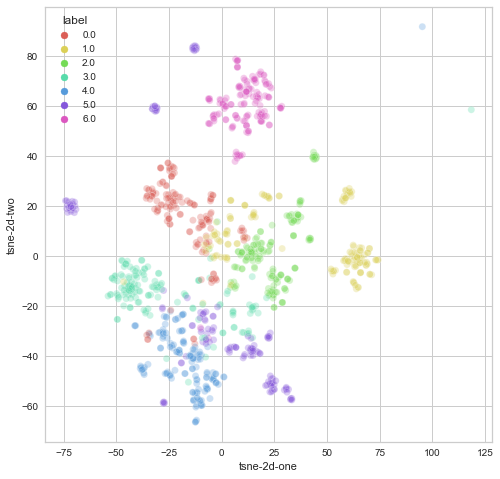

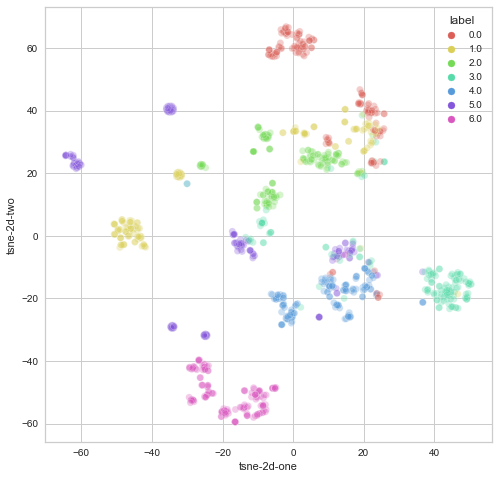

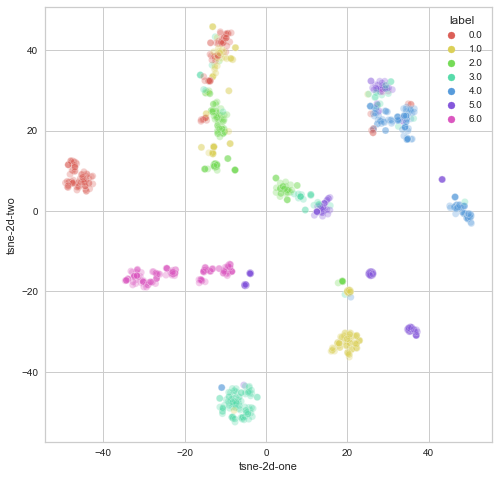

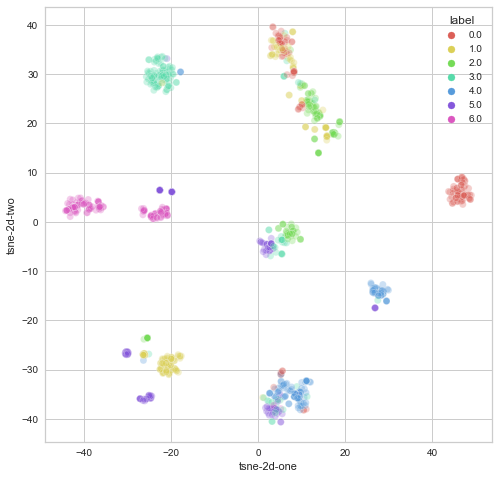

1:19: E231 missing whitespace after ','
INFO:pycodestyle:1:19: E231 missing whitespace after ','
2:44: E251 unexpected spaces around keyword / parameter equals
INFO:pycodestyle:2:44: E251 unexpected spaces around keyword / parameter equals
2:46: E251 unexpected spaces around keyword / parameter equals
INFO:pycodestyle:2:46: E251 unexpected spaces around keyword / parameter equals


In [69]:
for elt in range(1, 5):
    tsne_Plot_2D(10*elt, df_subset_bow, sep=True)

#### TSNE sur TFIDF

In [70]:
df_subset_tf = data_tf.copy(deep=True)
df_subset_tf['label'] = OrdinalEncoder().fit_transform(np.array(
                                                       data['product_category_tree']).reshape(-1, 1))

3:80: E501 line too long (101 > 79 characters)
INFO:pycodestyle:3:80: E501 line too long (101 > 79 characters)


In [71]:
df_subset_tf['label']

0       4.0
1       0.0
2       0.0
3       4.0
4       4.0
       ... 
1045    0.0
1046    0.0
1047    0.0
1048    0.0
1049    0.0
Name: label, Length: 1050, dtype: float64

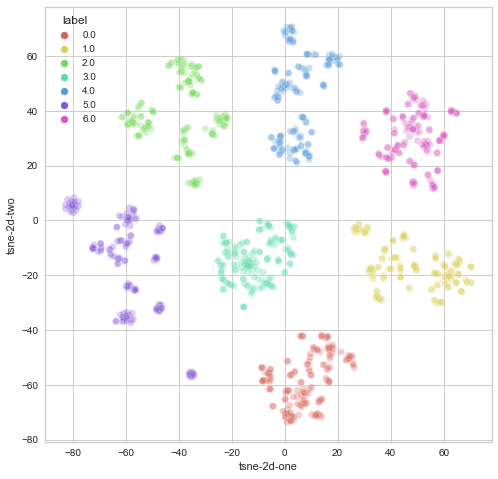

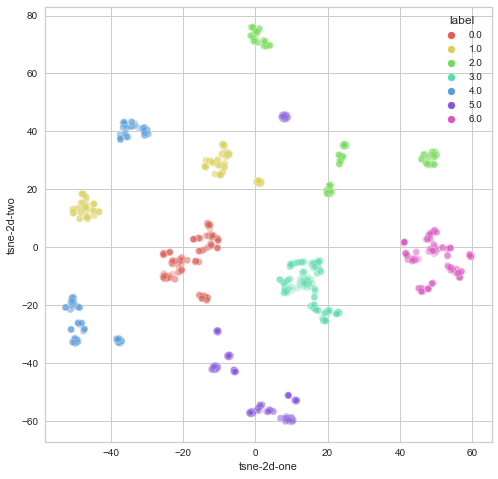

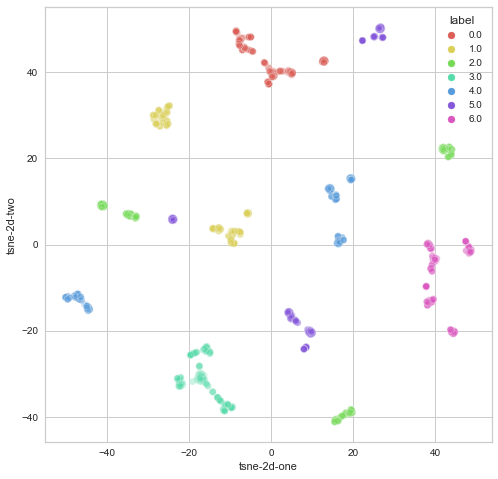

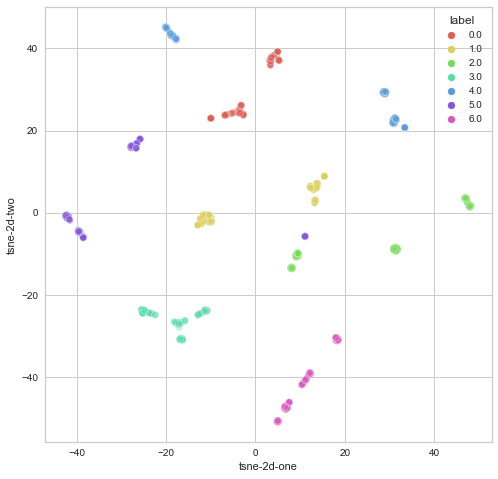

1:19: E231 missing whitespace after ','
INFO:pycodestyle:1:19: E231 missing whitespace after ','
2:43: E251 unexpected spaces around keyword / parameter equals
INFO:pycodestyle:2:43: E251 unexpected spaces around keyword / parameter equals
2:45: E251 unexpected spaces around keyword / parameter equals
INFO:pycodestyle:2:45: E251 unexpected spaces around keyword / parameter equals


In [72]:
for elt in range(1, 5):
    tsne_Plot_2D(10*elt, df_subset_tf, sep=True)

####  TSNE sur Universal Encoder

In [73]:
df_subset_univenc = data_univenc.copy(deep=True)
df_subset_univenc['label'] = OrdinalEncoder().fit_transform(np.array(data['product_category_tree']).reshape(-1, 1))

2:80: E501 line too long (115 > 79 characters)
INFO:pycodestyle:2:80: E501 line too long (115 > 79 characters)


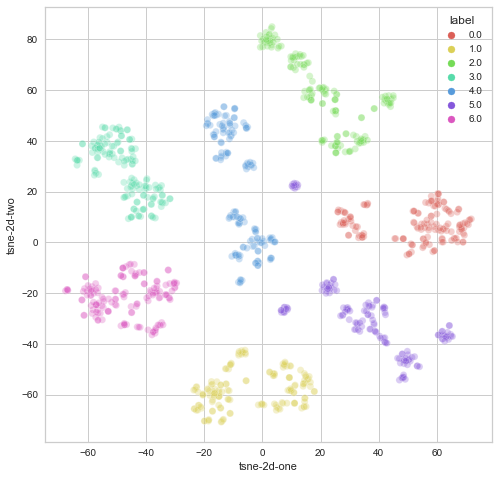

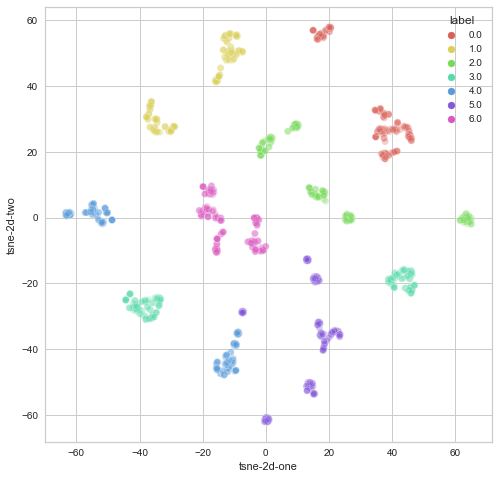

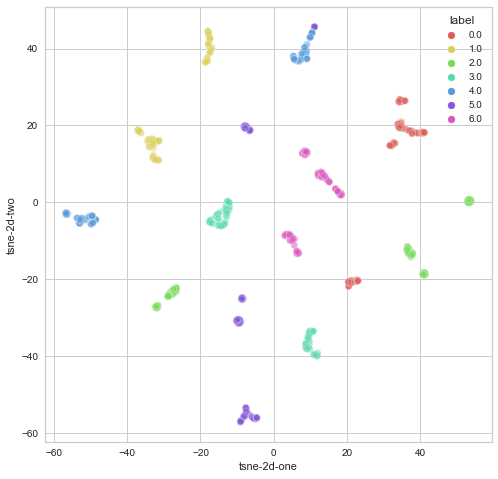

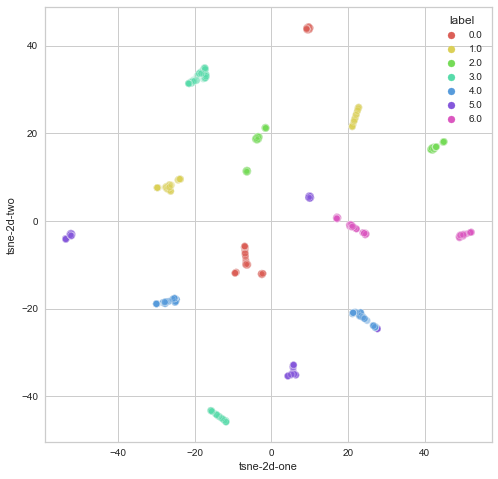

1:19: E231 missing whitespace after ','
INFO:pycodestyle:1:19: E231 missing whitespace after ','
2:48: E251 unexpected spaces around keyword / parameter equals
INFO:pycodestyle:2:48: E251 unexpected spaces around keyword / parameter equals
2:50: E251 unexpected spaces around keyword / parameter equals
INFO:pycodestyle:2:50: E251 unexpected spaces around keyword / parameter equals


In [74]:
for elt in range(1, 5):
    tsne_Plot_2D(10*elt, df_subset_univenc, sep=True)

On remarque qu' avec TF-IDF on a une représentation plus intéressante avec un clustering bien évident, mais les résultats avec Universal Encoder sont meilleures de loin.

###  Analyse des Composantes principales

#### TF-IDF

In [75]:
acp = PCA()
data_pca = acp.fit_transform(data_tf)

In [76]:
print("\nQualité cumulée en % :\n ", np.round(np.cumsum(
                                              acp.explained_variance_ratio_) *
                                              100,
                                              1))
var = np.round(np.cumsum(acp.explained_variance_ratio_) * 100, 1)
var[400]


Qualité cumulée en % :
  [  6.3  10.   12.7 ... 100.  100.  100. ]


94.3

5:62: E231 missing whitespace after ','
INFO:pycodestyle:5:62: E231 missing whitespace after ','


<Figure size 864x576 with 0 Axes>

<BarContainer object of 1050 artists>

Text(0.5, 0, "rang de l'axe d'inertie")

Text(0, 0.5, "pourcentage d'inertie")

Text(0.5, 1.0, 'Eboulis des valeurs propres')

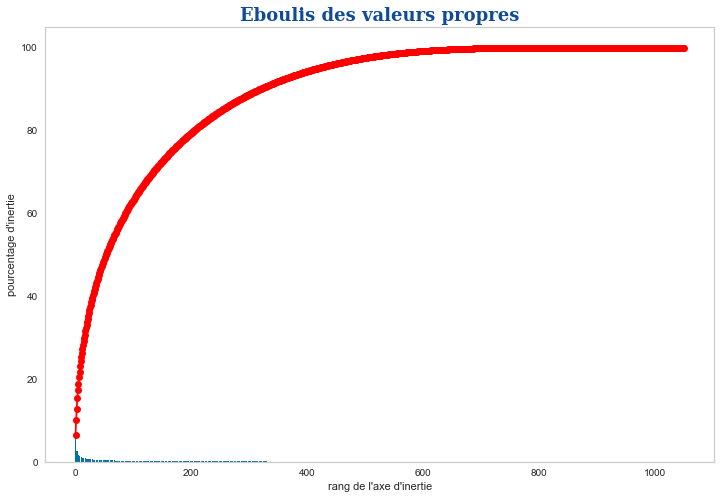

In [77]:
# Variances expliquées
varexpl = acp.explained_variance_ratio_*100
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18}
# Projection de l'éboulis des valeurs propres
plt.figure(figsize=(12, 8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(), c="red", marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.grid()
plt.title("Eboulis des valeurs propres", fontdict=font_title)
plt.show(block=False)

En utilisant 400 axes principaux, on garde 94.3% de la variance expliquée.

In [78]:
n = 400
acp = PCA(n)
data_pca = acp.fit_transform(data_tf)
data_pca = pd.DataFrame(data_pca, index=data_tf.index,
                        columns=["F" + str(i + 1) for i in range(n)])
data_pca

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F391,F392,F393,F394,F395,F396,F397,F398,F399,F400
0,-0.224642,-0.043360,-0.009068,-0.061294,-0.143555,-0.194081,-0.050584,-0.005453,0.027239,-0.147210,...,-0.036251,-0.009297,-0.046597,0.005629,-0.003185,-0.001897,-0.005245,0.012507,0.023318,-0.046507
1,-0.222075,-0.021375,-0.181129,-0.058052,-0.037304,-0.184338,-0.063933,0.031328,-0.407569,0.533193,...,-0.009294,0.002518,0.020329,0.020485,0.010630,-0.036642,-0.015138,-0.004023,0.006756,-0.012433
2,-0.206342,-0.045898,-0.155055,-0.037896,-0.055158,-0.133958,0.026089,-0.055427,-0.375047,0.435332,...,0.011727,0.004282,0.025896,0.006488,-0.009403,0.017664,-0.025852,0.008917,0.006642,-0.005448
3,-0.249304,-0.052038,0.018473,-0.169179,-0.057427,-0.243834,-0.029141,-0.033061,0.014357,0.008544,...,0.003773,-0.021381,-0.002933,0.004515,0.045295,0.023161,-0.002656,-0.010145,0.014636,0.033222
4,-0.250438,-0.054025,0.003155,-0.135670,-0.085038,-0.213474,-0.012757,-0.016942,0.014472,0.037540,...,0.000902,0.030503,-0.001511,-0.007838,-0.017163,-0.031297,-0.005620,-0.020784,-0.006215,0.015147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,-0.183647,-0.009786,0.007303,-0.019280,-0.127942,0.016886,0.000926,0.026504,-0.035628,-0.014983,...,-0.013049,-0.015262,-0.019489,-0.030709,-0.019334,-0.053812,-0.025364,-0.024333,-0.017829,-0.058807
1046,-0.219519,-0.020028,0.028850,0.026484,-0.135601,0.000359,0.029701,0.024700,-0.022430,0.009816,...,0.043828,-0.011273,0.040998,0.006877,-0.008853,0.061688,-0.027631,0.048924,0.049186,-0.020066
1047,0.015225,-0.056032,0.080294,-0.028911,-0.021713,0.102106,-0.018455,0.062660,-0.029793,-0.001784,...,0.034649,-0.008294,0.032917,0.006911,-0.006630,-0.014325,-0.008795,0.003745,-0.008947,-0.007762
1048,-0.013610,-0.053115,0.075666,-0.030840,-0.048197,0.111973,-0.013634,0.069347,-0.040396,0.000853,...,-0.011568,0.021342,-0.018157,0.009270,0.009782,-0.006301,0.010263,-0.001996,-0.004516,-0.017364


#### Universal encoder

In [79]:
acp = PCA(0.99)
data_pca_univ = acp.fit_transform(data_univenc)
data_pca_univ = pd.DataFrame(data_pca_univ, index=data_univenc.index)
data_pca_univ

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,-0.559529,0.064070,0.014718,-0.010627,-0.176290,0.172699,0.075407,-0.090721,-0.074702,-0.011720,...,-0.012081,0.002251,-0.017630,0.005533,-0.004132,0.008916,0.003909,-0.013068,-0.009414,-0.008873
1,-0.465613,0.151005,0.055097,0.081342,0.005561,0.068985,-0.037126,0.088544,-0.240437,-0.095448,...,0.013920,-0.016107,-0.009295,-0.014100,-0.002092,-0.007126,0.000524,-0.011678,-0.002985,0.023930
2,-0.449795,0.012132,0.040772,0.151085,-0.222410,0.086437,0.030232,0.032332,-0.247652,-0.250275,...,-0.008279,0.006544,0.044076,-0.017660,-0.011516,0.018374,0.013797,0.015002,0.013506,-0.015999
3,-0.509905,0.192723,-0.008278,0.099454,-0.080752,0.246942,0.025125,-0.170457,-0.107715,-0.151970,...,-0.009297,-0.001838,0.002009,-0.006510,0.017834,-0.012214,0.003520,-0.013174,-0.027447,0.001805
4,-0.448192,0.134650,-0.039680,0.122702,-0.180341,0.263017,0.049022,-0.196110,-0.171330,-0.172197,...,-0.005481,-0.010470,-0.019897,-0.023067,-0.016287,0.014161,0.001627,0.001685,-0.010702,-0.020272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,-0.363006,-0.192074,-0.083484,0.237197,-0.268123,0.065033,0.213095,-0.077439,-0.200481,-0.109503,...,0.016907,0.007263,-0.026300,-0.003136,0.011826,-0.010632,-0.006746,0.013863,0.011911,-0.009042
1046,-0.397442,-0.144152,-0.139244,0.119867,-0.038599,-0.007654,0.087311,-0.162122,-0.190255,-0.137464,...,0.004774,-0.012493,-0.005070,-0.007509,-0.025759,0.011746,0.013436,-0.018422,0.019175,-0.002065
1047,0.146041,0.084238,-0.114244,0.131571,0.088742,-0.138704,0.091102,0.019481,-0.240927,-0.139143,...,-0.023689,0.009705,0.017020,-0.010458,-0.005671,0.012028,-0.006754,-0.004503,0.011433,0.000747
1048,0.107487,0.097425,-0.220206,0.153964,0.074751,-0.164197,0.117885,-0.063626,-0.237145,-0.088343,...,0.005885,0.005376,-0.010275,-0.003987,0.005087,-0.007732,-0.010092,0.002003,-0.006788,0.001994


## Clustering avec K-means

### Recherche du nombre de clusters optimal

Elbow Method avec Elbow visualizer: On va utiliser la méthode du coude/"Elbow", pour trouver le meilleur nombre de cluster et voir si ça correspond avec le nombre théorique, qui est 7. L'analyse va se baser sur 3 métriques, à savoir:
- Distortion:  la somme des distances au carré de chaque point à son centre attribué
- Calinski_harabasz: calcule le rapport de dispersion entre et au sein des clusters. 

C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=9,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto', random_state=0,
                                  tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='distortion', timings=False)

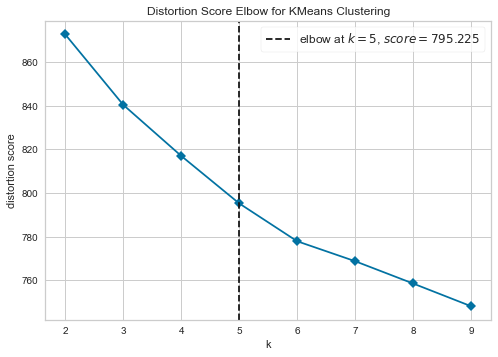

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
# Instantier le model clustering  et visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(
    model, k=(2, 10), timings=False)

visualizer.fit(data_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=9,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto', random_state=0,
                                  tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='silhouette', timings=False)

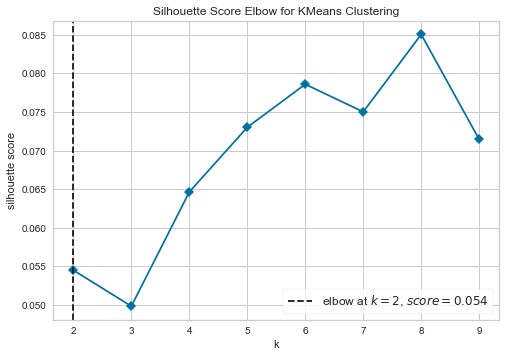

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [81]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(
    model, k=(2, 10), metric='silhouette', timings=False
)
visualizer.fit(data_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=9,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto', random_state=0,
                                  tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='calinski_harabasz',
                 timings=False)

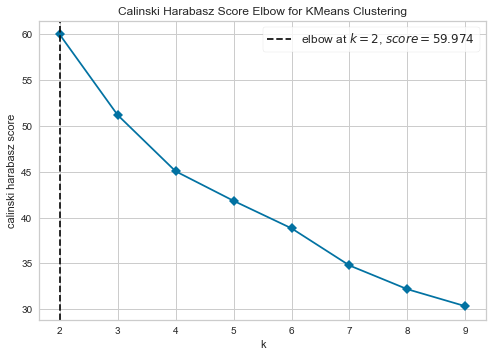

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [82]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(
    model, k=(2, 10), metric='calinski_harabasz', timings=False
)
visualizer.fit(data_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Modélisation avec Kmeans

#### TF-IDF

In [83]:
def Model(donnee, nbr):
    model = KMeans(n_clusters=nbr, random_state=42).fit(donnee)
    centroids = model.cluster_centers_
    labels = model.labels_
    inertia = model.inertia_
    silhouette_scores = silhouette_score(donnee, model.labels_)
    index_db_val = davies_bouldin_score(donnee, labels)
    donnee['label'] = model.labels_
    print("L'inertie: ", inertia)
    print("silhouette_scores: ", silhouette_scores)
    print("index_db_val: ", index_db_val)
    return model

In [84]:
model = Model(data_pca, 7)

L'inertie:  766.398795635016
silhouette_scores:  0.060534432906090535
index_db_val:  3.4273834531779204


On va créer un tableau croisé pour pouvoir récupérer la correspondance entre les labels prédits et les catégories

In [85]:
import sklearn.metrics as metrics
conf_mat = metrics.confusion_matrix(df_subset_tf['label'], data_pca['label'])

<Figure size 1008x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Matrice de corrélations ')

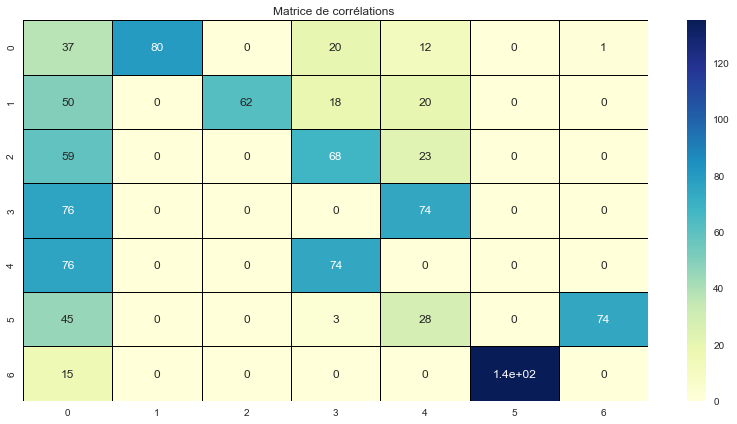

2:80: E501 line too long (82 > 79 characters)
INFO:pycodestyle:2:80: E501 line too long (82 > 79 characters)


In [86]:
plt.figure(figsize=(14, 7))
sns.heatmap(conf_mat, linewidths=.5, cmap="YlGnBu", annot=True, linecolor='black')
plt.title('Matrice de corrélations ')
plt.show()

In [87]:
corresp = [5, 1, 3, 2, 6, 0, 4]
data_pca['label'] = data_pca['label'].apply(lambda x : corresp[x]) 
conf_mat = metrics.confusion_matrix(df_subset_tf['label'], data_pca['label'])
print(metrics.classification_report(df_subset_tf['label'], data_pca['label']))

ValueError: too many values to unpack (expected 3)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       150
         1.0       0.00      0.00      0.00       150
         2.0       0.37      0.45      0.41       150
         3.0       0.00      0.00      0.00       150
         4.0       0.00      0.00      0.00       150
         5.0       0.13      0.30      0.18       150
         6.0       0.00      0.00      0.00       150

    accuracy                           0.11      1050
   macro avg       0.07      0.11      0.08      1050
weighted avg       0.07      0.11      0.08      1050



<Figure size 1008x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Matrice de corrélations ')

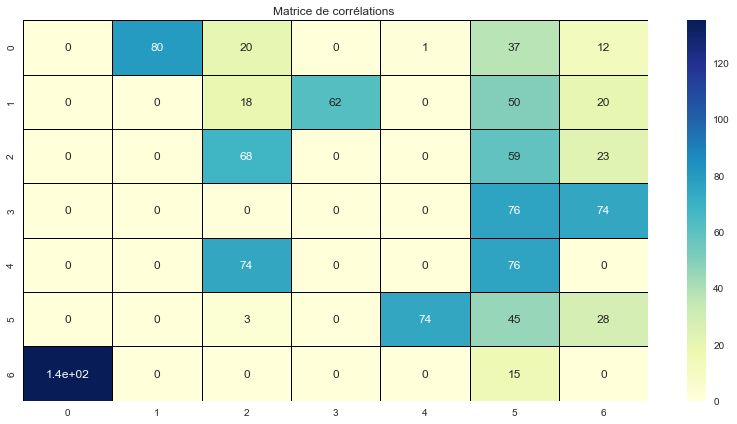

2:80: E501 line too long (83 > 79 characters)
INFO:pycodestyle:2:80: E501 line too long (83 > 79 characters)
2:82: E202 whitespace before ')'
INFO:pycodestyle:2:82: E202 whitespace before ')'


In [88]:
plt.figure(figsize=(14, 7))
sns.heatmap(conf_mat, linewidths=.5, cmap="YlGnBu", annot=True, linecolor='black')
plt.title('Matrice de corrélations ')
plt.show()

In [89]:
adjusted_rand_score(data_pca['label'], df_subset_tf['label'])

0.26194678721727827

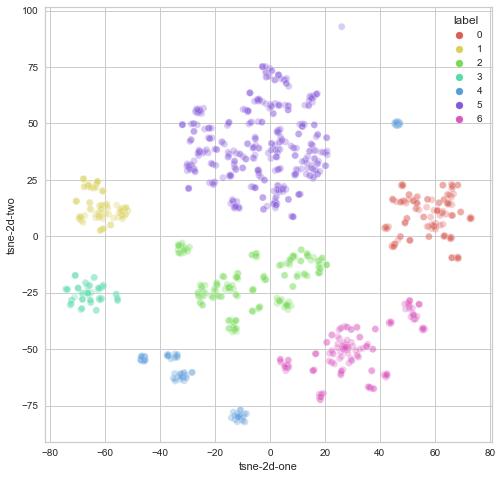

In [90]:
tsne_Plot_2D(10, data_pca, sep=True)

#### Universal encoder

In [91]:
model_univ = Model(data_pca_univ, 7)

In [92]:
import sklearn.metrics as metrics
conf_mat = metrics.confusion_matrix(df_subset_tf['label'], data_pca_univ['label'])

2:80: E501 line too long (82 > 79 characters)
INFO:pycodestyle:2:80: E501 line too long (82 > 79 characters)


In [93]:
conf_mat

array([[ 13,  17,   1,   2,  14,  98,   5],
       [ 44,   0,   0,   0,  21,   5,  80],
       [ 58,   0,   0,   0,  24,   0,  68],
       [ 70,   0,   1,   0,  76,   3,   0],
       [ 12,  74,   0,   0,   0,  64,   0],
       [ 43,   1,  55,   0,  36,   1,  14],
       [  8,   0,   0, 130,   0,   6,   6]], dtype=int64)

<Figure size 1008x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Matrice de corrélations ')

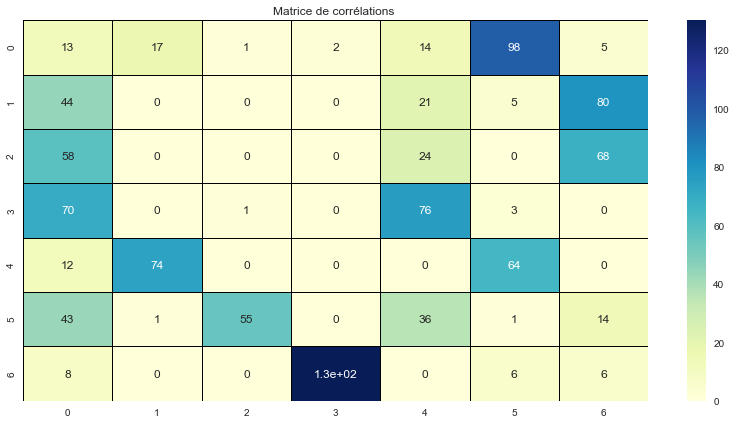

2:80: E501 line too long (82 > 79 characters)
INFO:pycodestyle:2:80: E501 line too long (82 > 79 characters)


In [94]:
plt.figure(figsize=(14, 7))
sns.heatmap(conf_mat, linewidths=.5, cmap="YlGnBu", annot=True, linecolor='black')
plt.title('Matrice de corrélations ')
plt.show()

In [95]:
corresp = [5, 6, 0, 4, 1, 2, 3]
data_pca_univ['label'] = data_pca_univ['label'].apply(lambda x : corresp[x])
conf_mat = metrics.confusion_matrix(df_subset_tf['label'], data_pca_univ['label'])

ValueError: too many values to unpack (expected 3)

In [96]:
adjusted_rand_score(data_pca_univ['label'], df_subset_tf['label'])

0.3141776335963846

In [97]:
print(metrics.classification_report(df_subset_tf['label'], data_pca_univ['label']))

1:80: E501 line too long (83 > 79 characters)
INFO:pycodestyle:1:80: E501 line too long (83 > 79 characters)


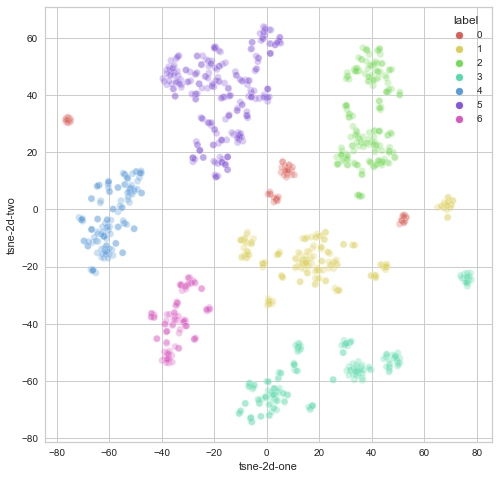

In [98]:
tsne_Plot_2D(10, data_pca_univ, sep=True)

## Import, traitement et préparation du  jeu de données Images

### Pré-traitement des images via SIFT

#### Création des descripteurs de chaque image

* Pour chaque image: passage en gris et equalisation de l'histogramme de l'intensité.
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [99]:
sift = cv.SIFT_create()
images = np.array([cv.cvtColor(cv.imread(file), cv.COLOR_BGR2GRAY) for file in glob.glob(r"\Users\Utilisateur\Downloads\Data\Images\*.jpg")])

<ipython-input-99-df233b1daf39>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  images = np.array([cv.cvtColor(cv.imread(file), cv.COLOR_BGR2GRAY) for file in glob.glob(r"\Users\Utilisateur\Downloads\Data\Images\*.jpg")])
2:80: E501 line too long (141 > 79 characters)
INFO:pycodestyle:2:80: E501 line too long (141 > 79 characters)


In [100]:
kp = sift.detect(images[1])# detecter les  keypoints
kp

[<KeyPoint 0000020481D009C0>,
 <KeyPoint 0000020481E75390>,
 <KeyPoint 0000020481E0CED0>,
 <KeyPoint 0000020481E25120>,
 <KeyPoint 0000020481E25E40>,
 <KeyPoint 0000020481E25240>,
 <KeyPoint 0000020481E25CF0>,
 <KeyPoint 0000020481ED50C0>,
 <KeyPoint 0000020481ED5090>,
 <KeyPoint 0000020481ED50F0>,
 <KeyPoint 0000020481ED5120>,
 <KeyPoint 0000020481ED5240>,
 <KeyPoint 0000020481ED5210>,
 <KeyPoint 0000020481ED5270>,
 <KeyPoint 0000020481ED52A0>,
 <KeyPoint 0000020481ED52D0>,
 <KeyPoint 0000020481ED5300>,
 <KeyPoint 0000020481ED5330>,
 <KeyPoint 0000020481ED5360>,
 <KeyPoint 0000020481ED53C0>,
 <KeyPoint 0000020481ED5390>,
 <KeyPoint 0000020481ED53F0>,
 <KeyPoint 0000020481ED5420>,
 <KeyPoint 0000020481ED5450>,
 <KeyPoint 0000020481ED5480>,
 <KeyPoint 0000020481ED54B0>,
 <KeyPoint 0000020481ED54E0>,
 <KeyPoint 0000020481ED5510>,
 <KeyPoint 0000020481ED5540>,
 <KeyPoint 0000020481ED5570>,
 <KeyPoint 0000020481ED55A0>,
 <KeyPoint 0000020481ED55D0>,
 <KeyPoint 0000020481ED5600>,
 <KeyPoint

1:28: E261 at least two spaces before inline comment
INFO:pycodestyle:1:28: E261 at least two spaces before inline comment


In [101]:
desc = sift.compute(images[1], None)

In [102]:
img = cv.drawKeypoints(images[1], kp, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

1:80: E501 line too long (92 > 79 characters)
INFO:pycodestyle:1:80: E501 line too long (92 > 79 characters)


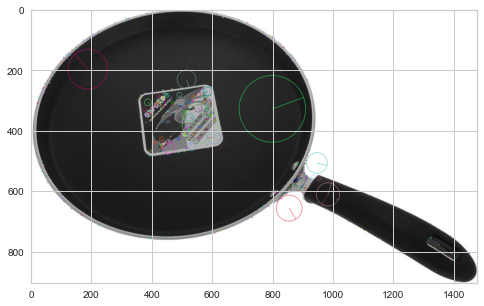

In [103]:
plt.imshow(img)

In [104]:
kp = sift.detect(images[0])  # detecter les  keypoints
img = cv.drawKeypoints(images[0], kp, None)

In [105]:
kp, desc = sift.detectAndCompute(images[0], None)

1:3: E231 missing whitespace after ','
INFO:pycodestyle:1:3: E231 missing whitespace after ','


In [106]:
keypoints, descriptors = [], []
for elt in images:
    elt = cv.equalizeHist(elt)
    key, des = sift.detectAndCompute(elt, None)
    keypoints.append(key)
    descriptors.append(des)

In [107]:
sift_keypoints_by_img = np.asarray(descriptors)
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis=0)
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [108]:
print("Nombre de descripteurs : ", len(descriptors[0]))

In [109]:
descriptors

[array([[ 13.,   2.,   6., ...,   0.,   0.,   0.],
        [ 22.,  11.,  13., ...,   0.,   0.,   0.],
        [ 14.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  1.,   1.,   3., ...,   1.,   1.,   0.],
        [  8.,   0.,   0., ...,   0.,   0.,  10.],
        [  3.,  59., 119., ...,   0.,   0.,   0.]], dtype=float32),
 array([[ 4.,  2.,  6., ...,  5.,  0.,  0.],
        [96., 20.,  0., ...,  9.,  2.,  0.],
        [78., 60., 17., ..., 16.,  0.,  0.],
        ...,
        [26.,  8.,  0., ...,  8.,  2.,  1.],
        [ 4.,  0.,  0., ...,  0.,  0.,  0.],
        [49.,  0.,  0., ...,  1., 37., 13.]], dtype=float32),
 array([[31.,  2.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  5.],
        ...,
        [ 5.,  1.,  1., ...,  0.,  0.,  3.],
        [ 1.,  1.,  1., ...,  0.,  0.,  4.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]], dtype=float32),
 array([[  0.,  90.,  97., ...,   2.,   6.,  23.],
        [  1.

#### Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [110]:
k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print("Nombre de clusters estimés : ", k)
print("Création de", k, "clusters de descripteurs ...")

# Clustering
kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
kmeans.fit(sift_keypoints_all)

C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1572: RuntimeWarning: init_size=300 should be larger than k=3010. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1572: RuntimeWarning: init_size=300 should be larger than k=3010. Setting it to 3*k
  cluster_centers = _init_centroids(
C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1572: RuntimeWarning: init_size=300 should be larger than k=3010. Setting it to 3*k
  cluster_centers = _init_centroids(


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3010, n_init=3, random_state=0,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

### Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [111]:
# Creation of histograms (features)

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(des)
    if nb_des == 0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

ValueError: too many values to unpack (expected 3)

### Réductions de dimension

#### Réduction de dimension PCA et clustering avec Kmeans

In [112]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = PCA(n_components=0.99)
feat_pca = pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

In [113]:
im_features.shape

(1050, 3010)

In [114]:
feat_pca.shape

(1050, 743)

#### Réduction de dimension T-SNE et clustering avec Kmeans
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [115]:
tsne = TSNE(n_components=2, perplexity=10,
            random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["label"] = df_subset_tf['label']
print(df_tsne.shape)

5:32: E231 missing whitespace after ','
INFO:pycodestyle:5:32: E231 missing whitespace after ','


In [116]:
def Model_(donnee, nbr):
    model = KMeans(n_clusters=nbr, random_state=0).fit(donnee)
    centroids = model.cluster_centers_
    labels = model.labels_
    inertia = model.inertia_
    silhouette_scores = silhouette_score(donnee, model.labels_)
    index_db_val = davies_bouldin_score(donnee, labels)
    print("L'inertie: ", inertia)
    print("silhouette_scores: ", silhouette_scores)
    print("index_db_val: ", index_db_val)
    return model


cls = Model_(X_tsne, 7)
df_tsne["cluster"] = cls.labels_

In [117]:
cls = KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)
df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

Text(0.5, 1.0, 'TSNE selon les clusters')

Text(0.5, 0, 'tsne1')

Text(0, 0.5, 'tsne2')

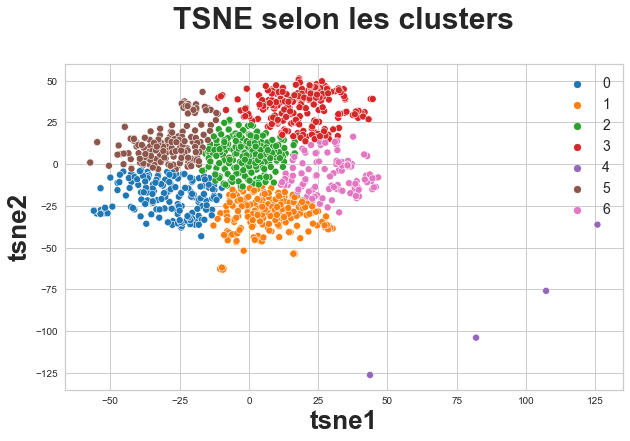

12:30: W291 trailing whitespace
INFO:pycodestyle:12:30: W291 trailing whitespace
17:15: E231 missing whitespace after ','
INFO:pycodestyle:17:15: E231 missing whitespace after ','


In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7),
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')
plt.legend(prop={'size': 14})

plt.show()

labels = df_tsne["label"]
print("ARI : ", adjusted_rand_score(labels, cls.labels_))

In [119]:
model_pca = Model_(feat_pca, 7)
df_tsne["cluster_pca"] = model_pca.labels_

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

Text(0.5, 1.0, 'les clusters selon PCA')

Text(0.5, 0, 'tsne1')

Text(0, 0.5, 'tsne2')

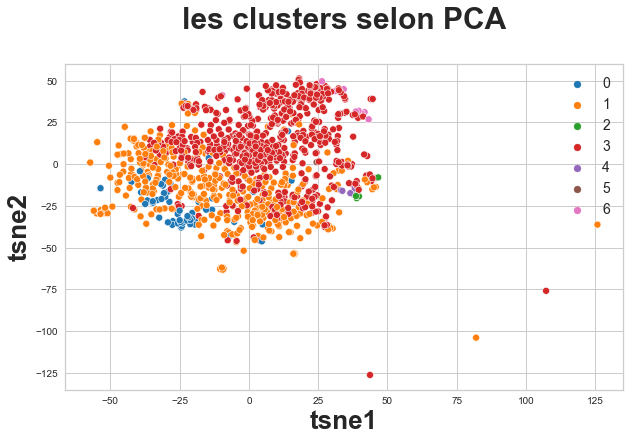

12:30: W291 trailing whitespace
INFO:pycodestyle:12:30: W291 trailing whitespace
17:15: E231 missing whitespace after ','
INFO:pycodestyle:17:15: E231 missing whitespace after ','


In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster_pca",
    palette=sns.color_palette('tab10', n_colors=7),
    data=df_tsne,
    legend="brief")

plt.title('les clusters selon PCA', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')
plt.legend(prop={'size': 14})

plt.show()


print("ARI : ", adjusted_rand_score(labels, model_pca.labels_))

### Transfer learning avec le model VGG16 pré-entrainé sur ImageNet

On va utiliser le réseau de neuronne convolutif VGG16 pour extraire les features

In [121]:
images = np.array([cv.imread(file) for file in glob.glob(r"\Users\Utilisateur\Downloads\Data\Images\*.jpg")])

<ipython-input-121-90042556e205>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  images = np.array([cv.imread(file) for file in glob.glob(r"\Users\Utilisateur\Downloads\Data\Images\*.jpg")])
1:80: E501 line too long (109 > 79 characters)
INFO:pycodestyle:1:80: E501 line too long (109 > 79 characters)


In [122]:
# load an image from file
from keras.preprocessing import image
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224,3))
print(model.summary())
for layer in model.layers:
   layer.trainable = False
prepared_images = []
for filepath in glob.iglob(r"\Users\Utilisateur\Downloads\Data\Images\*.jpg"):

    images = image.load_img(filepath, target_size=(224, 224))
# convert the image pixels to a numpy array
    images = image.img_to_array(images)
# reshape data for the model
    images = images.reshape((1, images.shape[0], images.shape[1], images.shape[2]))
# prepare the image for the VGG model
    prepared_images.append(model.predict(tf.keras.applications.vgg16.preprocess_input(images)))
prepared_images = np.array(prepared_images).reshape(1050, -1)

Using TensorFlow backend.
C:\Users\Utilisateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\PIL\Image.py:2911: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
2:38: W291 trailing whitespace
INFO:pycodestyle:2:38: W291 trailing whitespace
3:75: E231 missing whitespace after ','
INFO:pycodestyle:3:75: E231 missing whitespace after ','
6:4: E111 indentation is not a multiple of four
INFO:pycodestyle:6:4: E111 indentation is not a multiple of four
9:1: W293 blank line contains whitespace
INFO:pycodestyle:9:1: W293 blank line contains whitespace
14:80: E501 line too long (83 > 79 characters)
INFO:pycodestyle:14:80: E501 line too long (83 > 79 characters)
16:80: E501 line too long (95 > 79 characters)
INFO:pycodestyle:16:80: E501 line too long (95 > 79 characters)
17:57: E231 missing whitespace after ','
INFO:pycodestyl

#### Réduction de dimension PCA/TSNE et clustering avec Kmeans

In [123]:
print("Dimensions dataset avant réduction PCA : ", prepared_images.shape)
pca = PCA(n_components=0.99)
feat_pca = pca.fit_transform(prepared_images)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

In [124]:
tsne = TSNE(n_components=2, perplexity=10,
            random_state=6)
X_tsne = tsne.fit_transform(feat_pca)
df_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=['tsne1', 'tsne2'])
df_tsne["label"] = df_subset_tf['label']
print(df_tsne.shape)
cls = KMeans(n_clusters=7, random_state=0).fit(X_tsne)
df_tsne["cluster"] = cls.labels_

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

Text(0.5, 1.0, 'Les clusters TSNE selon')

Text(0.5, 0, 'tsne1')

Text(0, 0.5, 'tsne2')

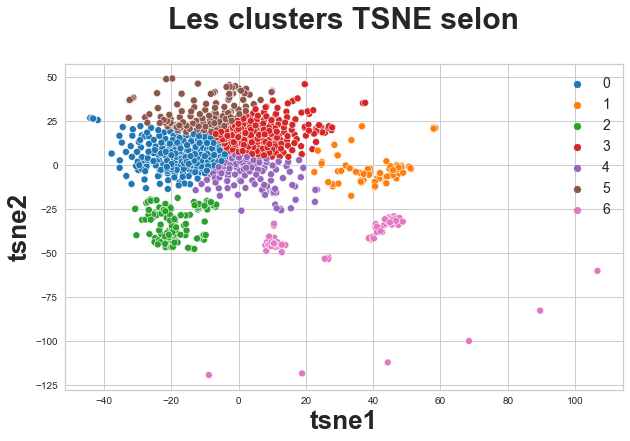

In [125]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7),
    data=df_tsne,
    legend="brief")
plt.title('Les clusters TSNE selon', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')
plt.legend(prop={'size': 14})
plt.show()

In [126]:
model_pca = KMeans(n_clusters=7, random_state=0).fit(feat_pca)

In [127]:
df_tsne["cluster_pca"] = model_pca.labels_

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

Text(0.5, 1.0, 'les clusters selon PCA')

Text(0.5, 0, 'tsne1')

Text(0, 0.5, 'tsne2')

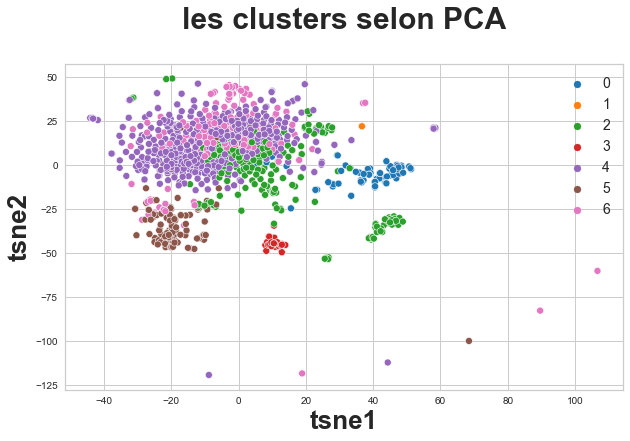

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster_pca",
    palette=sns.color_palette('tab10', n_colors=7),
    data=df_tsne,
    legend="brief")
plt.title('les clusters selon PCA', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')
plt.legend(prop={'size': 14})
plt.show()

## Combinaison des données textuelles et images

Dans cette partie on va combiner les résultats de la réduction dimensionnelle des données issues du codeur universel et de VGG16

In [129]:
feat_pca

array([[ 1.01791217e+03,  2.88611794e+01,  4.19176254e+01, ...,
         1.04345341e+01, -8.22273922e+00,  6.59818983e+00],
       [-1.11561470e+02, -1.45116165e+02,  5.69144707e+01, ...,
        -1.20435610e+01,  4.96547651e+00, -1.25619555e+01],
       [-2.84918701e+02, -1.54303665e+02, -9.34838333e+01, ...,
        -6.67179966e+00, -8.46945858e+00, -1.81081314e+01],
       ...,
       [-1.14080124e+02, -2.16897278e+01,  3.00461426e+02, ...,
        -1.95063603e+00, -1.09495182e+01, -9.56357670e+00],
       [-2.14944656e+02, -3.29083466e+02, -1.08541351e+02, ...,
         7.64399385e+00,  4.41639453e-01,  5.97515297e+00],
       [-1.78448029e+02, -1.82454971e+02,  3.58976860e+01, ...,
        -5.13796866e-01, -2.74384642e+00,  6.06974721e-01]], dtype=float32)

In [130]:
data_pca_univ

,0,1,2,3,4,5,6,7,8,9,...,313,314,315,316,317,318,319,label,tsne-2d-one,tsne-2d-two
0,-0.559529,0.064070,0.014718,-0.010627,-0.176290,0.172699,0.075407,-0.090721,-0.074702,-0.011720,...,0.005533,-0.004132,0.008916,0.003909,-0.013068,-0.009414,-0.008873,2,30.758469,46.388790
1,-0.465613,0.151005,0.055097,0.081342,0.005561,0.068985,-0.037126,0.088544,-0.240437,-0.095448,...,-0.014100,-0.002092,-0.007126,0.000524,-0.011678,-0.002985,0.023930,2,42.843895,37.914932
2,-0.449795,0.012132,0.040772,0.151085,-0.222410,0.086437,0.030232,0.032332,-0.247652,-0.250275,...,-0.017660,-0.011516,0.018374,0.013797,0.015002,0.013506,-0.015999,5,-2.867122,38.767101
3,-0.509905,0.192723,-0.008278,0.099454,-0.080752,0.246942,0.025125,-0.170457,-0.107715,-0.151970,...,-0.006510,0.017834,-0.012214,0.003520,-0.013174,-0.027447,0.001805,2,38.805622,44.867195
4,-0.448192,0.134650,-0.039680,0.122702,-0.180341,0.263017,0.049022,-0.196110,-0.171330,-0.172197,...,-0.023067,-0.016287,0.014161,0.001627,0.001685,-0.010702,-0.020272,2,38.678627,44.795883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,-0.363006,-0.192074,-0.083484,0.237197,-0.268123,0.065033,0.213095,-0.077439,-0.200481,-0.109503,...,-0.003136,0.011826,-0.010632,-0.006746,0.013863,0.011911,-0.009042,5,-7.586207,34.127155
1046,-0.397442,-0.144152,-0.139244,0.119867,-0.038599,-0.007654,0.087311,-0.162122,-0.190255,-0.137464,...,-0.007509,-0.025759,0.011746,0.013436,-0.018422,0.019175,-0.002065,5,-7.288309,32.059654
1047,0.146041,0.084238,-0.114244,0.131571,0.088742,-0.138704,0.091102,0.019481,-0.240927,-0.139143,...,-0.010458,-0.005671,0.012028,-0.006754,-0.004503,0.011433,0.000747,1,0.602319,-31.160767
1048,0.107487,0.097425,-0.220206,0.153964,0.074751,-0.164197,0.117885,-0.063626,-0.237145,-0.088343,...,-0.003987,0.005087,-0.007732,-0.010092,0.002003,-0.006788,0.001994,1,0.914321,-33.009377


In [131]:
feat_pca = pd.DataFrame(feat_pca, index=data_univenc.index)

In [132]:
data_pca_univ = data_pca_univ.drop(['label', 'tsne-2d-one', 'tsne-2d-two'], axis=1)

1:44: E203 whitespace before ','
INFO:pycodestyle:1:44: E203 whitespace before ','
1:45: E231 missing whitespace after ','
INFO:pycodestyle:1:45: E231 missing whitespace after ','
1:80: E501 line too long (85 > 79 characters)
INFO:pycodestyle:1:80: E501 line too long (85 > 79 characters)
1:81: E251 unexpected spaces around keyword / parameter equals
INFO:pycodestyle:1:81: E251 unexpected spaces around keyword / parameter equals
1:83: E251 unexpected spaces around keyword / parameter equals
INFO:pycodestyle:1:83: E251 unexpected spaces around keyword / parameter equals
2:1: W391 blank line at end of file
INFO:pycodestyle:2:1: W391 blank line at end of file


In [133]:
result = pd.concat([data_pca_univ, feat_pca], axis=1)

In [134]:
result.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            930, 931, 932, 933, 934, 935, 936, 937, 938, 939],
           dtype='int64', length=1260)

### TSNE

On va appliquer l'algorithme TSNE sur les données.

In [135]:
tsne = TSNE(n_components=2, perplexity=10,
            random_state=6)
X_tsne = tsne.fit_transform(result)
df_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=['tsne1', 'tsne2'])
df_tsne["label"] = df_subset_tf['label']
print(df_tsne.shape)
cls = KMeans(n_clusters=7, random_state=0).fit(X_tsne)
df_tsne["cluster"] = cls.labels_

<Figure size 1008x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Matrice de corrélations ')

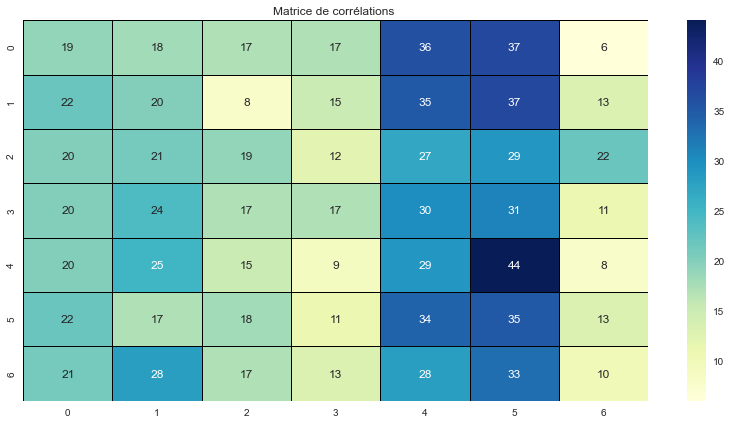

3:80: E501 line too long (82 > 79 characters)
INFO:pycodestyle:3:80: E501 line too long (82 > 79 characters)


In [136]:
conf_mat = metrics.confusion_matrix(df_subset_tf['label'], df_tsne["cluster"])
plt.figure(figsize=(14, 7))
sns.heatmap(conf_mat, linewidths=.5, cmap="YlGnBu", annot=True, linecolor='black')
plt.title('Matrice de corrélations ')
plt.show()

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

Text(0.5, 1.0, 'Les clusters TSNE selon')

Text(0.5, 0, 'tsne1')

Text(0, 0.5, 'tsne2')

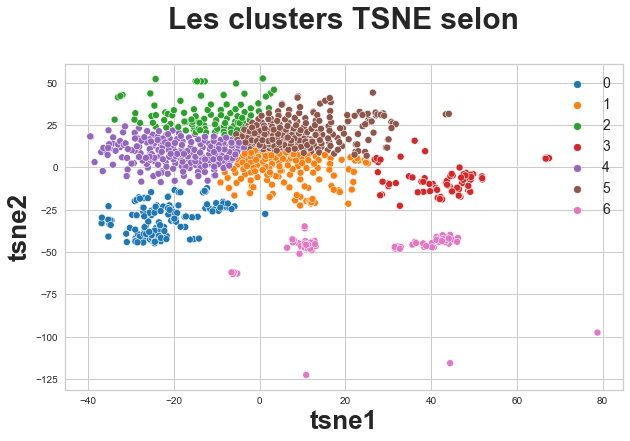

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7),
    data=df_tsne,
    legend="brief")
plt.title('Les clusters TSNE selon', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')
plt.legend(prop={'size': 14})
plt.show()

### PCA et clustering

On va effectuer un clustering sur les données résultats deu PCA

In [138]:
model_pca = KMeans(n_clusters=7, random_state=0).fit(result)

In [139]:
df_tsne["cluster_pca"] = model_pca.labels_

<Figure size 1008x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Matrice de corrélations ')

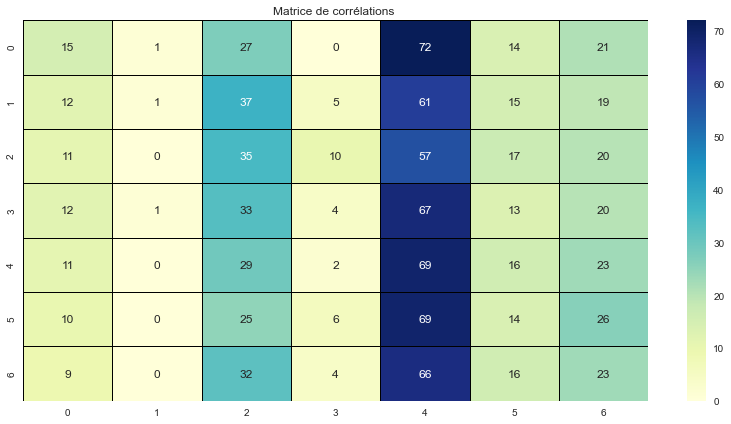

1:80: E501 line too long (82 > 79 characters)
INFO:pycodestyle:1:80: E501 line too long (82 > 79 characters)
3:80: E501 line too long (82 > 79 characters)
INFO:pycodestyle:3:80: E501 line too long (82 > 79 characters)


In [140]:
conf_mat = metrics.confusion_matrix(df_subset_tf['label'], df_tsne["cluster_pca"])
plt.figure(figsize=(14, 7))
sns.heatmap(conf_mat, linewidths=.5, cmap="YlGnBu", annot=True, linecolor='black')
plt.title('Matrice de corrélations ')
plt.show()

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

Text(0.5, 1.0, 'les clusters selon PCA')

Text(0.5, 0, 'tsne1')

Text(0, 0.5, 'tsne2')

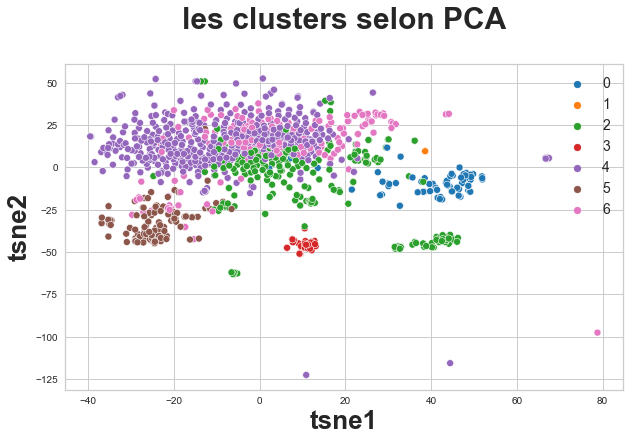

In [141]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster_pca",
    palette=sns.color_palette('tab10', n_colors=7),
    data=df_tsne,
    legend="brief")
plt.title('les clusters selon PCA', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')
plt.legend(prop={'size': 14})
plt.show()